# Clustering


In addition to dimensional reduction, clustering is another important unsupervised learning technique. 

We want to group or segment data points into subsets or "clusters", such that data points in the same cluster are more similar to each other than to those in other clusters.

Notice that clustering is different from classification. In classification, we have a set of labeled data points and we want to train a model to predict the labels of new data points. In clustering, we don't have labeled data points, and we want to group data points based on their similarity.

In this notebook, we will use the KMeans algorithm to cluster the data.

Given $x_1, x_2, ..., x_n \in \mathbb{R}^d$, 
the KMeans algorithm partitions the data points into $k$ clusters, $S_1 \cup S_2 \cup ... \cup S_k = \{1, 2, ..., n\}$, with centers $c_1, c_2, ..., c_k \in \mathbb{R}^d$ that minimize the total distance between the data points and their corresponding cluster centers.

$$ \min_{\substack{S_1, S_2, ..., S_k \\ c_1, c_2, ..., c_k}} \sum_{i=1}^{k} \sum_{j \in S_i} ||x_j - c_i||^2$$


Note that, given a fixed partition, the optimal cluster centers are the means of the data points in the cluster.

$$ c_i = \frac{1}{|S_i|} \sum_{j \in S_i} x_j$$



The k-means algorithm is an iterative algorithm that alternates between

1. Given centers $c_1, c_2, ..., c_k$, assign $x_i$ to the cluster with the closest center

$$k = \arg \min_{j} ||x_i - c_j||^2$$


2. Updating the cluster centers to be the mean of the data points in the cluster

$$ c_i = \frac{1}{|S_i|} \sum_{j \in S_i} x_j$$

See visualization of the KMeans algorithm [here](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/).

While Kmeans is a popular clustering algorithm, it has some limitations. For example

- The number of clusters $k$ needs to be specified in advance

- The algorithm usually converges to a local minimum, which depends on the initial cluster centers

- The solution are always ``sphere-like'' clusters

See [comparison of the clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html)

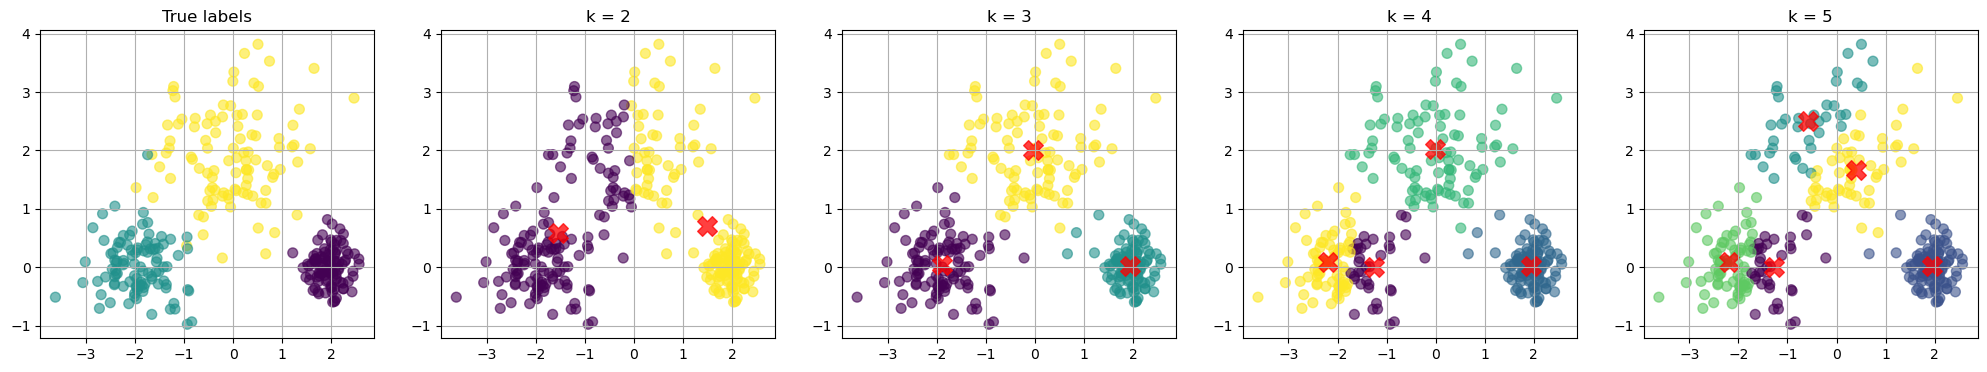

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
centers = [[2, 0], [-2, 0], [0, 2]]  # Mean positions of the Gaussians
cluster_std = [0.3, 0.5, 0.8]  # Standard deviations of the Gaussians
X, true_labels = make_blobs(n_samples=300, centers=centers, cluster_std=cluster_std, random_state=42)


# Specify the k values
k_values = [2, 3, 4, 5]
inertias = []

# Prepare the plot for clustering results
nfig = len(k_values)+1
fig, axes = plt.subplots(1, nfig , figsize=(5 * nfig, 4))

# Scatter plot for the true labels
scatter = axes[0].scatter(X[:, 0], X[:, 1], c=true_labels, s=50, cmap='viridis', alpha=0.6)
axes[0].set_title(f'True labels')
axes[0].grid(True)

# Apply k-Means for specified k values and visualize
for i in range(1,nfig):
    ax = axes[i]
    
    k = k_values[i-1]
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    y_kmeans = kmeans.predict(X)

    # Scatter plot for each k
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.6)
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Mark the centroids
    ax.set_title(f'k = {k}')
    ax.grid(True)



**How to choose the best k value?**

There is no definitive answer to this question. We can plot the loss as a function $k$. We know that the loss will decrease as we increase $k$.

Usually, we want to find the "elbow", after which increase $k$ gives diminishing improvement in the loss.



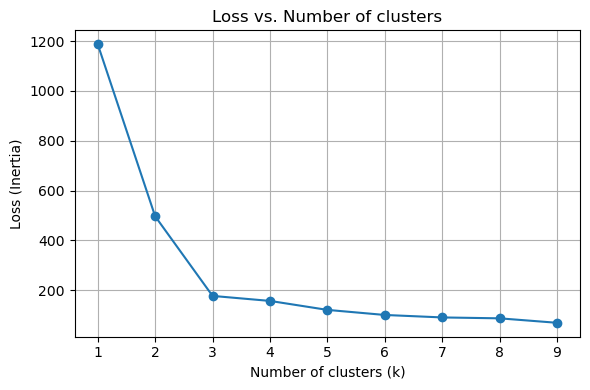

In [22]:

# Range of k values
k_values = range(1, 10)
inertias = []

# Apply k-Means for different values of k and record the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotting the results
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Loss (inertia) plot
ax.plot(k_values, inertias, marker='o')
ax.set_title('Loss vs. Number of clusters')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Loss')
ax.grid(True)

plt.tight_layout()
plt.show()
